# CA4 - Kongsberg satellite services

In [7]:
import pandas as pd
import seaborn as sns 
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform


In [2]:
traindata = pd.read_csv("data/train.csv")
testdata = pd.read_csv("data/test.csv")

missing_values = traindata.isnull().sum()
print(missing_values)
print(traindata.shape)

obj_ID           0
alpha            0
delta            0
u              362
g                0
r                0
i                0
z                0
run_ID           0
rerun_ID         0
cam_col          0
field_ID         0
spec_obj_ID      0
class            0
redshift         0
plate            0
MJD              0
fiber_ID         0
dtype: int64
(80000, 18)


In [3]:
traindata = traindata.dropna(axis=0)
missing_values = traindata.isnull().sum()
print(missing_values)
print(traindata.shape)

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64
(79638, 18)


In [4]:
size_mapping = {'GALAXY': 0, 'QSO': 1, 'STAR': 2}

# Making sure not to ruin everything if this cell is ran twice by accident. This turns the numbers into NaN
if traindata['class'].dtype == 'object' or isinstance(traindata['class'].dtype, pd.StringDtype):
    traindata['class'] = traindata['class'].map(size_mapping)

<Axes: >

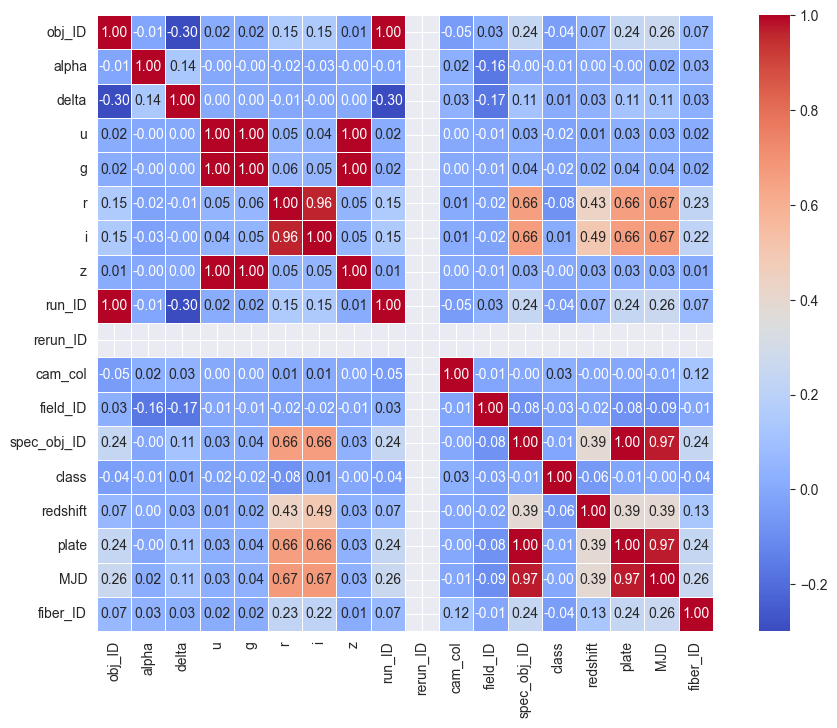

In [47]:
corr_matrix = traindata.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# More

In [5]:
X = traindata.drop(columns=["class"], axis=0)
y = traindata["class"]

In [8]:
# # Create the pipeline
# pipeline_randomforest = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# f1 = make_scorer(f1_score, average='weighted')
# scores = cross_val_score(pipeline_randomforest, X, y, cv=5, scoring=f1)

# # Print results
# print(f'F1 scores for each fold: {scores}')
# print(f'Average F1 score: {scores.mean():.3f}')

# pipeline_logistic_regression = Pipeline([
#     ("scaler", StandardScaler()),
#     ("pca", PCA()),
#     ('clf', LogisticRegression(solver='liblinear', multi_class='auto'))
# ])

# f1 = make_scorer(f1_score, average='weighted')
# scores = cross_val_score(pipeline_logistic_regression, X, y, cv=5, scoring=f1)

# # Print results
# print(f'F1 scores for each fold: {scores}')
# print(f'Average F1 score: {scores.mean():.3f}')


# pipeline_svm = Pipeline([
#     ("scaler", StandardScaler()),
#     ("pca", PCA(n_components=11)),
#     ('clf', SVC(C=1, gamma=0.1))
# ])

# param_grid = {
#     'clf__C': [0.1, 1, 10, 100],
#     'clf__gamma': [0.01, 0.1, 1, 10]
# }

# f1 = make_scorer(f1_score, average='weighted')

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=pipeline_svm,
#     param_grid=param_grid,
#     cv=5,
#     scoring=f1,
#     n_jobs=-1
# )

# # Fit to training data
# grid_search.fit(X, y)

# # Show best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print(f"Best F1 score: {grid_search.best_score_:.3f}")

pipeline_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=11)),
    ('clf', SVC(C=1, gamma=0.1))
])

param_dist = {
    'clf__C': loguniform(1e-2, 1e2),
    'clf__gamma': loguniform(1e-2, 1e1)
}

f1 = make_scorer(f1_score, average='weighted')

random_search = RandomizedSearchCV(
    estimator=pipeline_svm,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring=f1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

print("Best parameters:", random_search.best_params_)
print(f"Best F1 score: {random_search.best_score_:.3f}")

# pipeline_svm.fit(X, y)

# # Extract the fitted PCA object
# pca = pipeline_svm.named_steps['pca']

# # Plot cumulative explained variance
# plt.figure(figsize=(8, 4))
# plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
#         pca.explained_variance_ratio_.cumsum())
# plt.title('Proportion of cumulated variance explained per PC')
# plt.xlabel('Principal Component')
# plt.ylabel('Cumulative Explained Variance')
# plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
# plt.tight_layout()
# plt.show()

# RANDOMFOREST
#F1 scores for each fold: [0.97895722 0.97839225 0.97798518 0.97995489 0.97805614]
#Average F1 score: 0.979

# SVC + PCA(n=11), C=1, gamma=0.1
#F1 scores for each fold: [0.94580896 0.94429781 0.9459855  0.95862357 0.94499346]
#Average F1 score: 0.948

KeyboardInterrupt: 

In [ ]:
pipeline_randomforest.fit(X, y)

test_predictions = pipeline_randomforest.predict(testdata)

# Create a DataFrame with ID and predicted class
submission_df = pd.DataFrame({
    'ID': range(len(test_predictions)),
    'class': test_predictions
})

# Preview the first few rows
print(submission_df.head())

submission_df.to_csv('submission.csv', index=False)

   ID  class
0   0      0
1   1      2
2   2      2
3   3      2
4   4      2
